## Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis (EDA) on the provided dataset to uncover patterns and insights.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Display plots inline
%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv('Reviews.csv')  
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Summary Statistics

In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
# Check for missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
# Data types
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

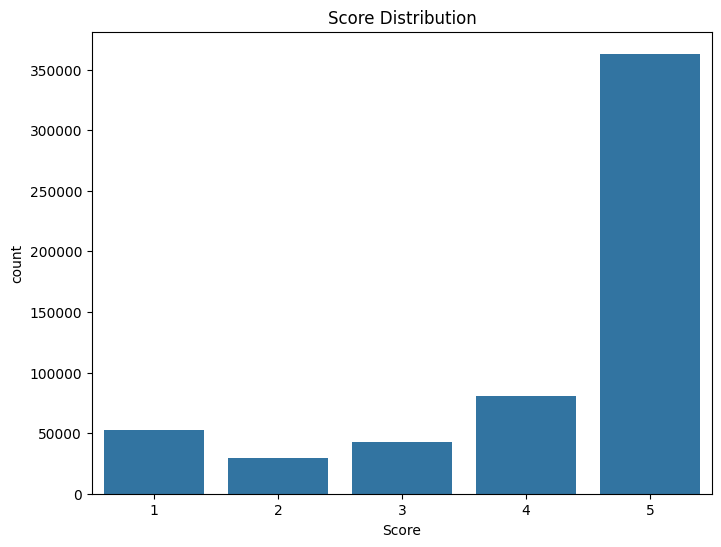

In [8]:
# Plot the distribution of Scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df)
plt.title('Score Distribution')
plt.show()

### Score Distribution

The bar plot above displays the distribution of scores in the dataset. It shows how frequently each score (ranging from 1 to 5) appears across all reviews.

#### Observations:
- **Score 5** has the highest frequency, indicating that many users rated their experiences positively.
- **Scores 1, 2, 3, and 4** are significantly less frequent compared to score 5. This could suggest a general trend toward positive reviews, which is common in some product datasets due to various factors like positive bias or effective product performance.

This distribution helps us understand the overall sentiment of the reviews and can guide further analysis, such as identifying patterns in positive reviews or exploring the reasons behind lower scores.

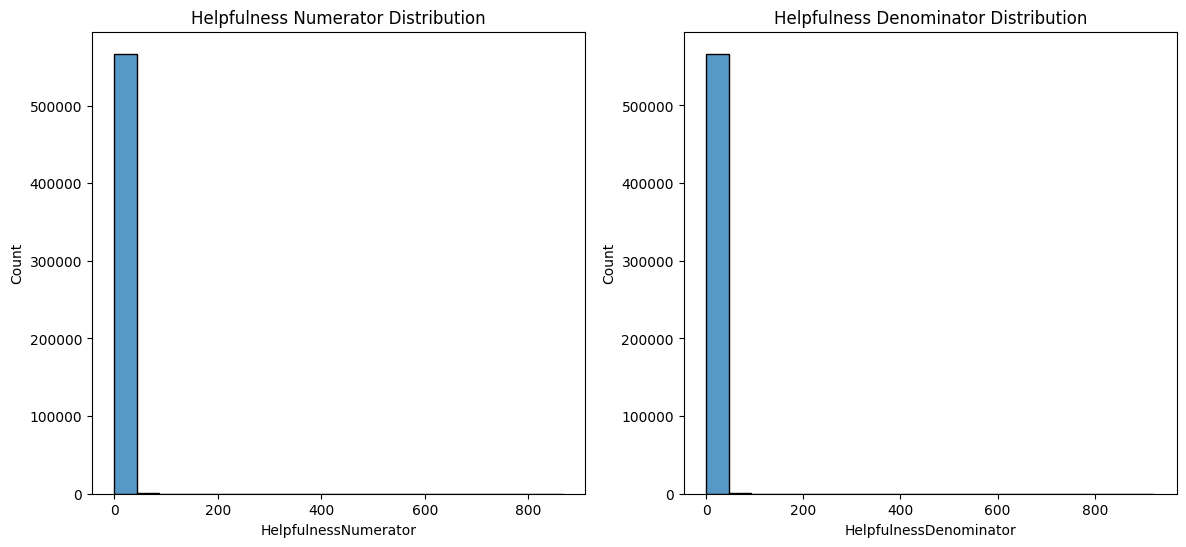

In [9]:
# Plot distributions for HelpfulnessNumerator and HelpfulnessDenominator
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['HelpfulnessNumerator'], bins=20)
plt.title('Helpfulness Numerator Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['HelpfulnessDenominator'], bins=20)
plt.title('Helpfulness Denominator Distribution')

plt.show()

### Helpfulness Distribution

The plots above illustrate the distribution of the Helpfulness Numerator and Helpfulness Denominator.

#### Observations:
- **Helpfulness Numerator**: Represents the number of people who found a review helpful.
- **Helpfulness Denominator**: Represents the total number of people who voted on the helpfulness of a review.
- Both distributions are highly skewed towards lower values, indicating that most reviews receive few helpfulness votes.

#### Insights:
- The skewed distribution suggests that while there are many reviews, only a small portion receives a significant number of helpfulness votes.
- Further analysis could explore why some reviews are more frequently voted as helpful, possibly linked to review length, score, or specific content.

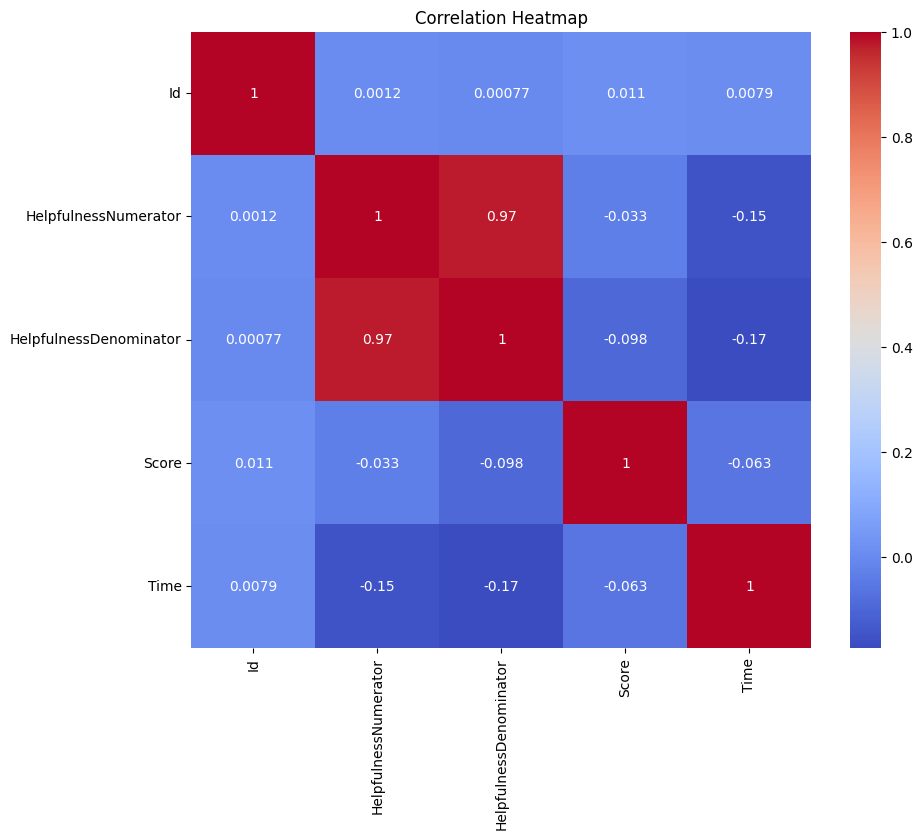

In [12]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap

The heatmap above visualizes the correlations between different numerical features in the dataset.

#### Observations:
- **HelpfulnessNumerator vs. HelpfulnessDenominator**: High positive correlation, indicating that as the number of helpful votes increases, the total votes also increase proportionally.
- **Score**: Shows a weak negative correlation with `HelpfulnessNumerator` and `HelpfulnessDenominator`, suggesting that higher or lower scores are slightly associated with the number of helpfulness votes.
- **Time**: Weak correlations with other variables, indicating minimal temporal influence on other numerical features.

#### Insights:
- The strong correlation between the numerator and denominator of helpfulness could indicate that people vote on helpfulness in a consistent manner across reviews.
- Low correlation of the `Score` with other variables suggests independent review experiences, with users likely motivated by different factors.

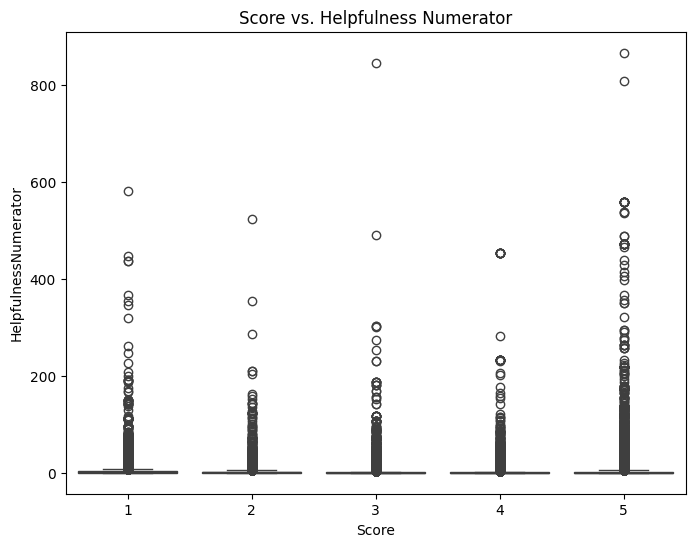

In [13]:
# Box plot of Score vs. Helpfulness Numerator
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', y='HelpfulnessNumerator', data=df)
plt.title('Score vs. Helpfulness Numerator')
plt.show()

### Score vs. Helpfulness Numerator

The box plot above illustrates the relationship between review `Score` and the `Helpfulness Numerator`, which indicates how many users found a review helpful.

#### Observations:
- Across all scores, the majority of reviews have lower helpfulness votes, as indicated by the concentration of data points near the bottom of each box.
- Outliers are present in each score category, showing instances where reviews received significantly more helpfulness votes.
- There is no clear trend suggesting that higher scores consistently correlate with higher helpfulness, implying that the score itself may not determine a review's perceived helpfulness.

#### Insights:
- The presence of outliers suggests that specific factors, not the score alone, contribute to a review's helpfulness. Content, length, and detail might play roles here.
- Further analysis could explore which review attributes make a review more helpful, beyond just the score.

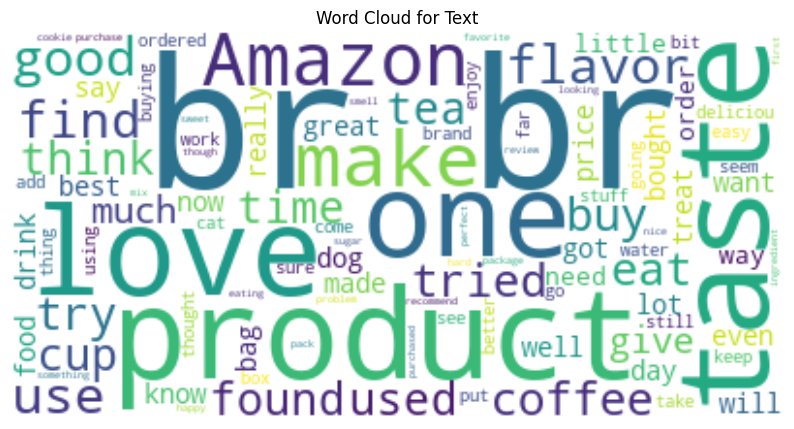

In [14]:
# Word cloud for Text
text = " ".join(review for review in df.Text.dropna())
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text')
plt.show()

### Word Cloud for Text

The word cloud above visualizes the most frequently occurring words in the review text, emphasizing common themes and topics discussed by reviewers.

#### Observations:
- **Frequent Words**: Terms like "product," "taste," "love," and "Amazon" appear prominently, indicating popular themes or sentiments.
- **Positive Sentiment**: Words such as "good," "great," and "best" suggest a generally positive tone in many reviews.
- **Common Topics**: Words like "coffee," "flavor," and "buy" point to recurring topics or subjects of interest among reviewers.

#### Insights:
- The prominence of certain words can help identify key aspects or features that reviewers focus on or value.
- Understanding these common terms can guide further analysis on what makes reviews favorable or influential.

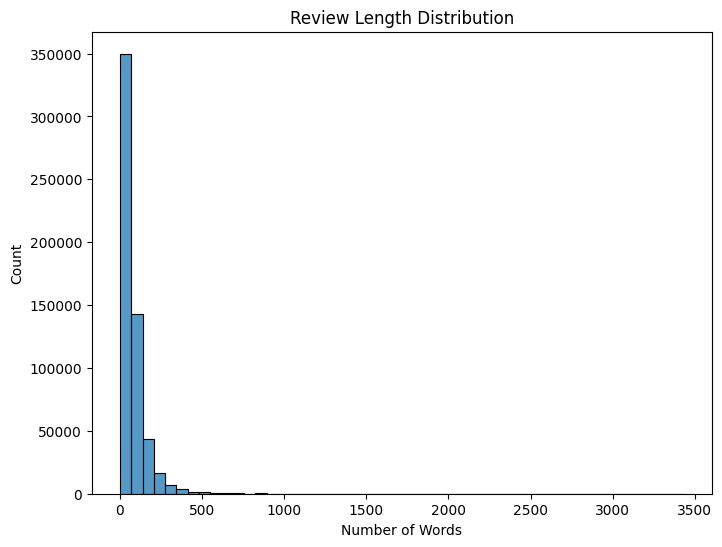

In [15]:
# Distribution of review lengths
df['ReviewLength'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['ReviewLength'], bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.show()

### Review Length Distribution

The histogram above shows the distribution of review lengths, measured by the number of words per review.

#### Observations:
- **Skewed Distribution**: The majority of reviews are relatively short, with most having fewer than 500 words.
- **Outliers**: There are a few very lengthy reviews, extending up to several thousand words, indicating a small number of highly detailed reviews.

#### Insights:
- The skewness suggests that users typically provide brief feedback.
- Analyzing the content of longer reviews could reveal in-depth insights or critical opinions.
- Understanding review length trends can help in tailoring strategies for engaging customers and encouraging comprehensive feedback.

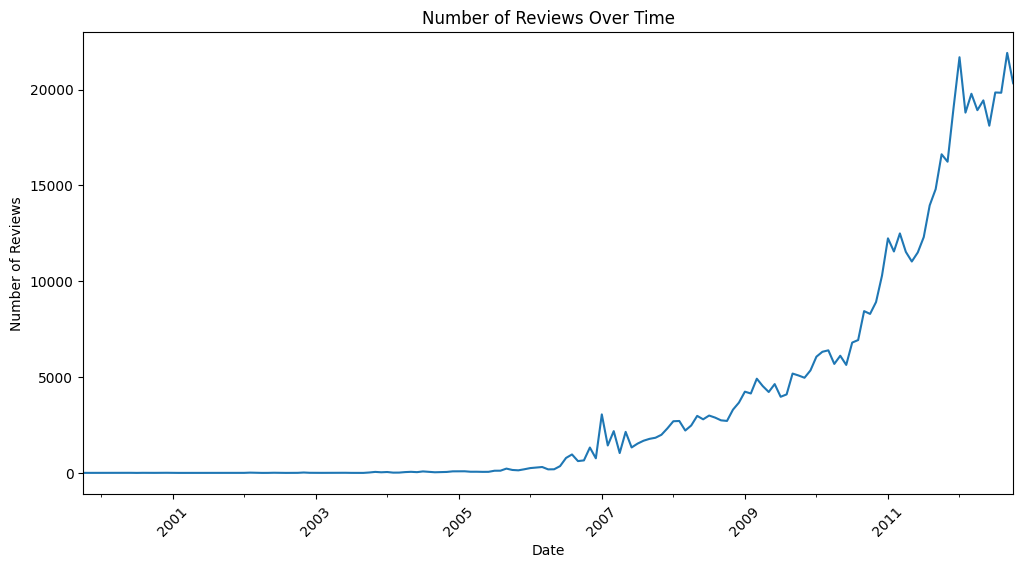

In [16]:
# Convert Time column to readable format
df['ReviewTime'] = pd.to_datetime(df['Time'], unit='s')
df['ReviewYearMonth'] = df['ReviewTime'].dt.to_period('M')

# Plot reviews over time
plt.figure(figsize=(12, 6))
df.groupby('ReviewYearMonth').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### Number of Reviews Over Time

The line plot above illustrates the trend in the number of reviews submitted over time.

#### Observations:
- **Steady Increase**: There is a noticeable upward trend in the number of reviews, especially after 2007.
- **Rapid Growth**: The most significant increase occurs between 2009 and 2012, indicating a surge in review activity.

#### Insights:
- The growth in reviews may correlate with increasing online consumer activity or the popularity of review platforms.
- Understanding the factors driving this growth could inform marketing strategies and platform improvements.
- Further analysis could explore whether this trend aligns with sales growth or changes in product offerings.